In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px

In [2]:
pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
data=pd.read_csv("/home/mrkernal/Project/processed_data/cleaned_data.csv")

In [5]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Month,year,Day,Revenue,ROI
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,1,2023,1,29850.0,3.402408
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,1,2023,2,9112.0,0.338512
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,1,2023,3,18891.0,3.979296
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,1,2023,4,26775.0,1.841527
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,1,2023,5,12073.0,5.872037


In [41]:
data['Date']=pd.to_datetime(data['Date'])

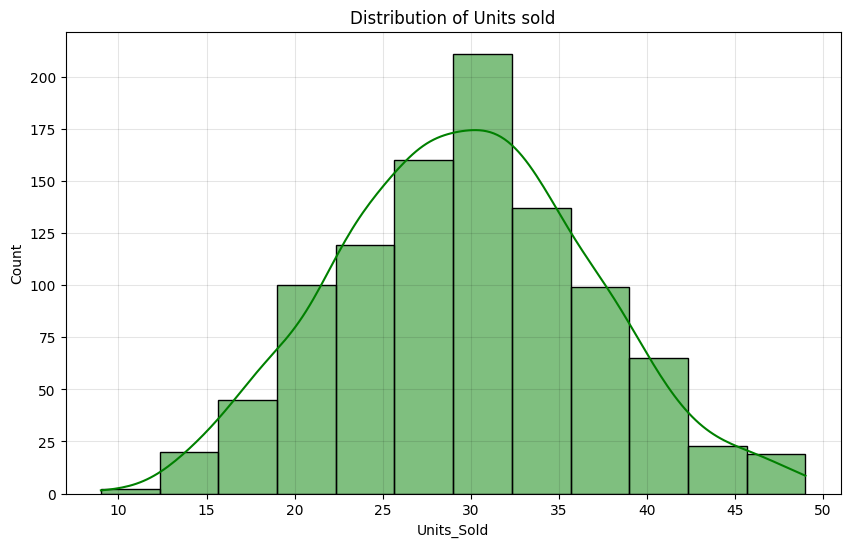

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data['Units_Sold'],kde=True,color='g',bins=12)
plt.grid(True,alpha=0.1,color='black')
plt.title('Distribution of Units sold')
plt.show()

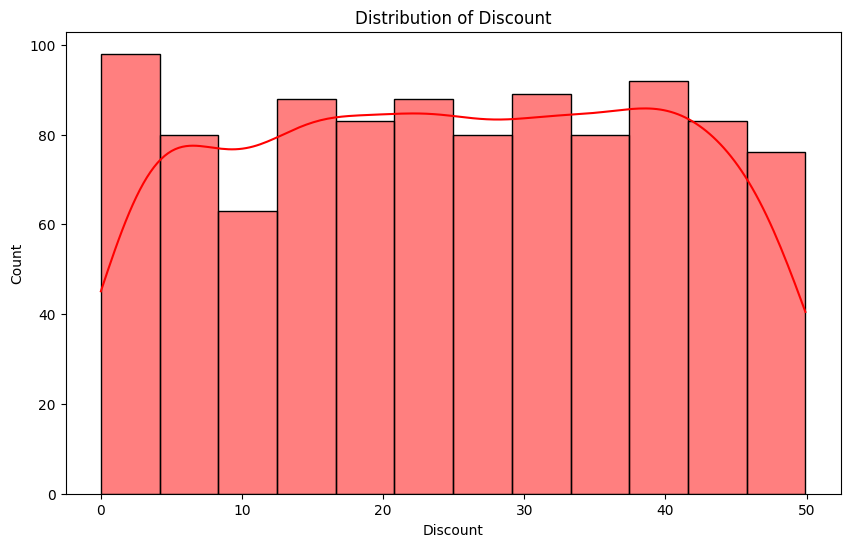

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data['Discount'],kde=True,color='r',bins=12)
plt.title('Distribution of Discount')
plt.show()

In [8]:
data['Product_Category'].value_counts().reset_index()

,Product_Category,count
0,Electronics,210
1,Sports,206
2,Toys,204
3,Home Decor,190
4,Fashion,190


In [9]:
# Product Category Distribution

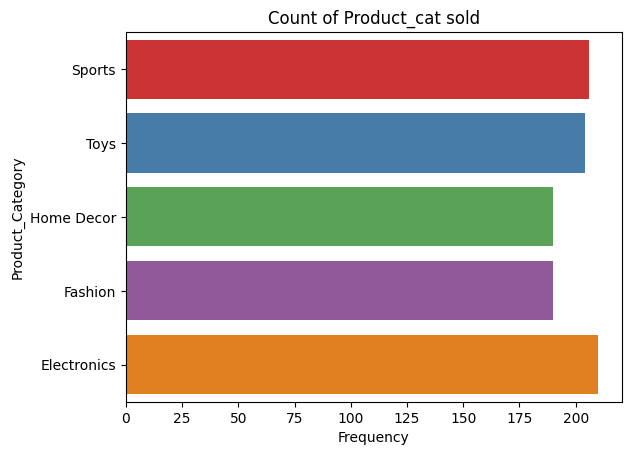

In [10]:
plt.show()
viz=sns.countplot(data['Product_Category'],palette='Set1')
plt.title('Count of Product_cat sold')
plt.xlabel('Frequency')
plt.ylabel('Product_Category')
plt.show()

In [11]:
# Product category sales wise

In [12]:
sales_wise_cat=data.groupby('Product_Category')['Units_Sold'].sum().rename('Total_sales').reset_index()
sales_wise_cat=sales_wise_cat.sort_values(by='Total_sales',ascending=False)

In [13]:
sales_wise_cat

,Product_Category,Total_sales
0,Electronics,6209
3,Sports,6122
4,Toys,5995
1,Fashion,5649
2,Home Decor,5647


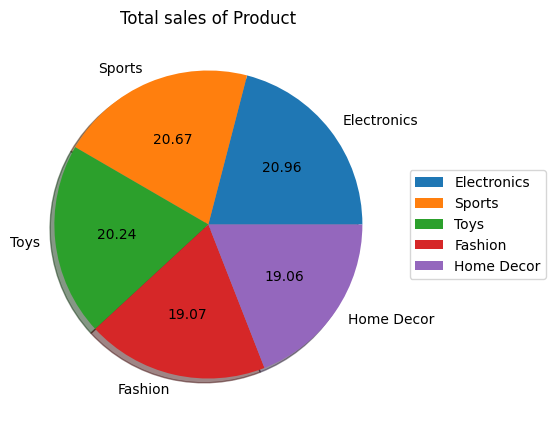

In [14]:
plt.figure(figsize=(10,5))
plt.pie(sales_wise_cat['Total_sales'],labels=sales_wise_cat['Product_Category'],shadow=True,autopct="%1.2f")
plt.title('Total sales of Product')
plt.legend(loc='center',bbox_to_anchor=(1.2, 0.5))
plt.show()

In [15]:
# correaltion

In [16]:
numerial_df=data.select_dtypes('number')
filtered_data=numerial_df.drop(columns=['Month', 'year', 'Day'])
correaltion=filtered_data.corr()

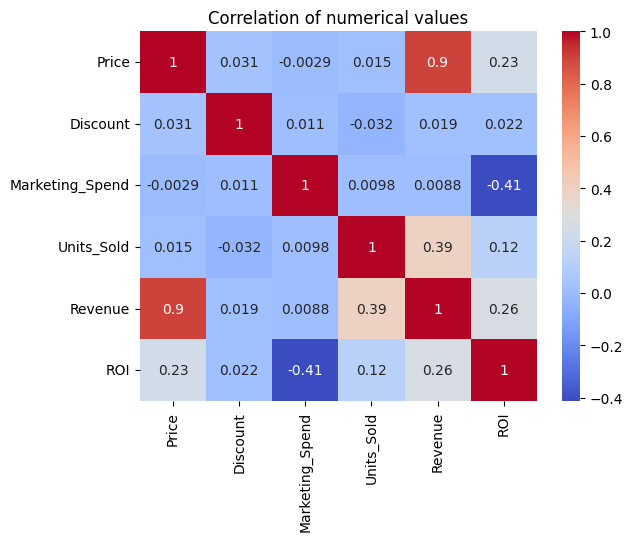

In [17]:
sns.heatmap(correaltion,annot=True,cmap='coolwarm')
plt.title('Correlation of numerical values')
plt.show()

In [18]:
year_wise_cat_sales=data.groupby(['year','Product_Category'])['Units_Sold'].sum().rename('Total_sales').reset_index()

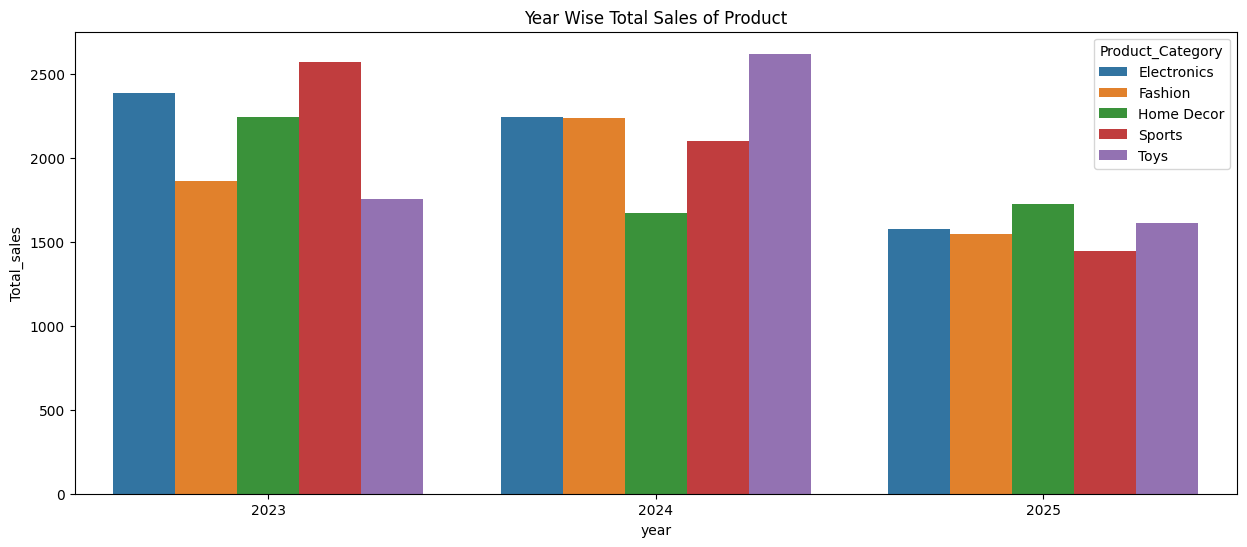

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x=year_wise_cat_sales['year'],y=year_wise_cat_sales['Total_sales'],
            hue=year_wise_cat_sales['Product_Category'])
plt.title('Year Wise Total Sales of Product')
plt.show()

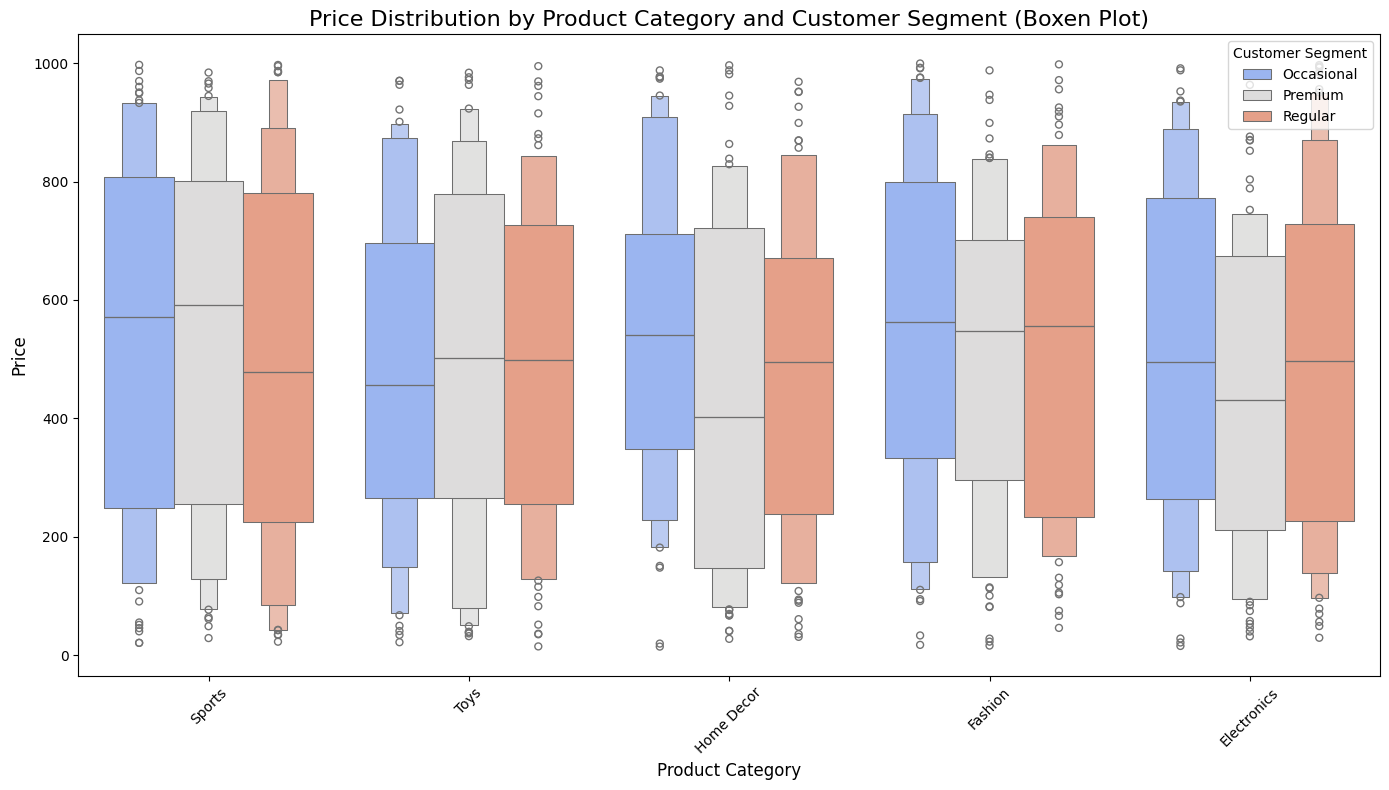

In [20]:
plt.figure(figsize=(14, 8))
sns.boxenplot(x=data['Product_Category'],y=data['Price'],hue=data['Customer_Segment'],palette='coolwarm')
plt.title('Price Distribution by Product Category and Customer Segment (Boxen Plot)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Customer Segment', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
month_wise_sales24=data.groupby(['year','Month'])['Units_Sold'].sum().rename('Month_Sales').reset_index()

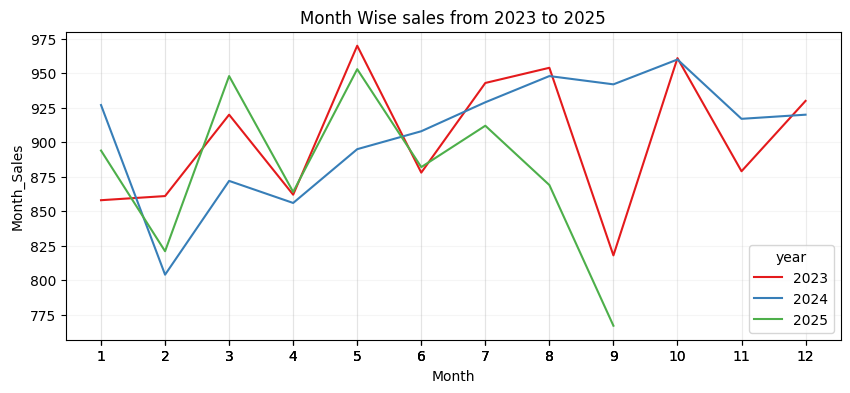

In [22]:
plt.figure(figsize=(10,4))
sns.lineplot(x=month_wise_sales24['Month'],y=month_wise_sales24['Month_Sales'],hue=month_wise_sales24['year']
            ,palette='Set1')
plt.xticks(ticks=month_wise_sales24['Month'])
plt.title('Month Wise sales from 2023 to 2025')
plt.grid(True,alpha=0.12)
plt.show()

In [23]:
category_discount=data.groupby('Product_Category', as_index=False)['Discount'].mean().reset_index()

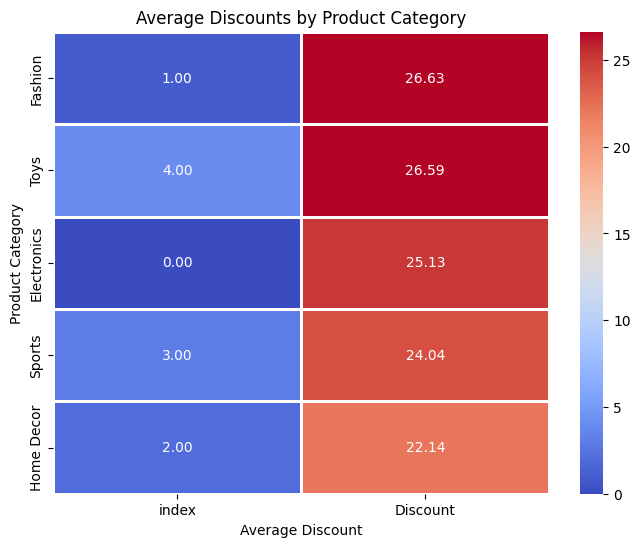

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(category_discount.set_index('Product_Category').sort_values('Discount',ascending=False), 
    annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title('Average Discounts by Product Category')
plt.xlabel('Average Discount')  
plt.ylabel('Product Category')
plt.show()


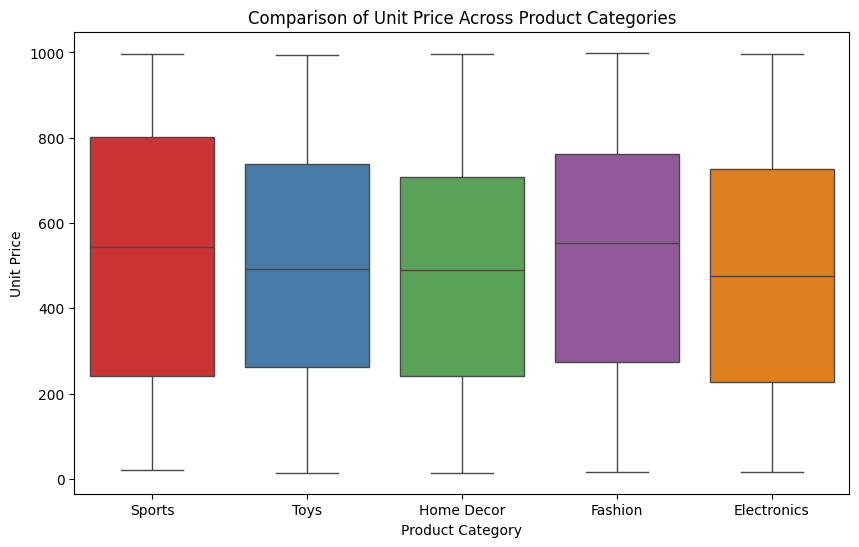

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Category', y='Price', data=data, palette='Set1')
plt.title('Comparison of Unit Price Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.show()

In [26]:
product_metrics=data.groupby('Product_Category').agg({'Units_Sold':'sum','Price':'mean','Discount':'mean',
                                                      'Marketing_Spend': 'sum','Revenue': 'sum','ROI': 'mean'}).reset_index()
product_metrics=product_metrics.sort_values('ROI',ascending=True)

product_metrics

,Product_Category,Units_Sold,Price,Discount,Marketing_Spend,Revenue,ROI
4,Toys,5995,497.479559,26.589265,1010547.77,3024937.0,4.614214
0,Electronics,6209,488.481857,25.134905,1064353.55,3022183.0,5.114178
2,Home Decor,5647,492.196737,22.137368,938726.12,2781494.0,5.776366
3,Sports,6122,526.164903,24.038592,978248.01,3201139.0,6.981621
1,Fashion,5649,522.460789,26.627158,920954.79,2967989.0,7.580621


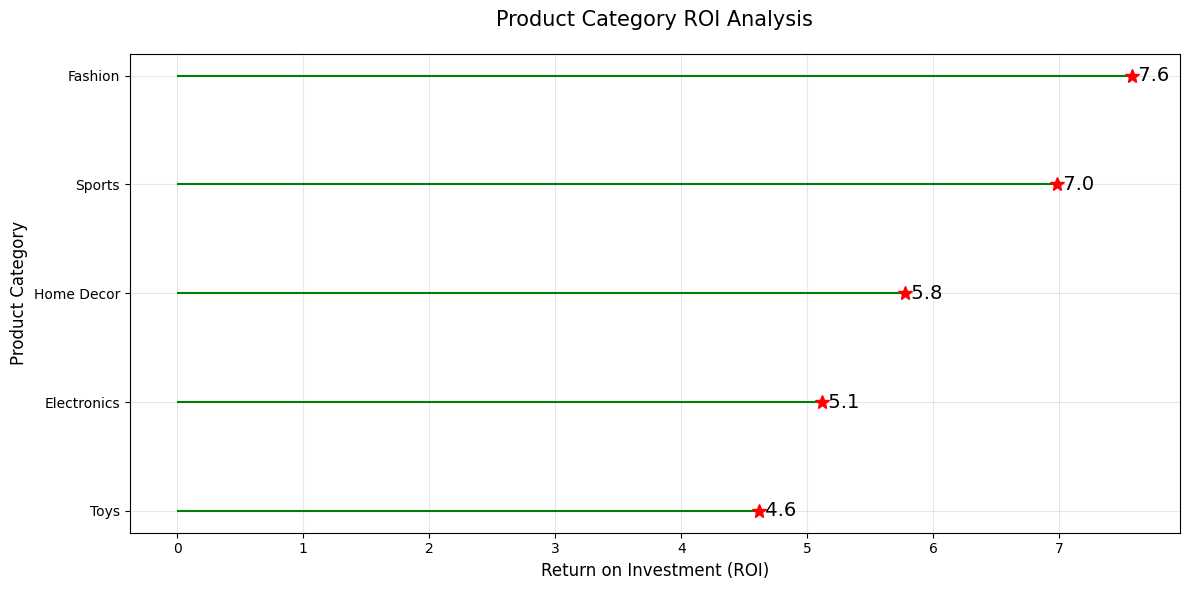

In [27]:
plt.figure(figsize=(12,6))
plt.hlines(y=product_metrics['Product_Category'], xmin=0, xmax=product_metrics['ROI'], color='green',)
plt.plot(product_metrics['ROI'], product_metrics['Product_Category'], "*", markersize=10, color='red')
plt.title('Product Category ROI Analysis', fontsize=15, pad=20)
plt.xlabel('Return on Investment (ROI)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
for i, v in enumerate(product_metrics['ROI']):
    plt.text(v, i, f' {v:1.1f}', va='center', fontsize=14)
plt.grid(True,alpha=0.1,color='navy')
plt.tight_layout()
plt.show()

In [68]:
fig = px.sunburst(data,path=['Product_Category', 'Customer_Segment'],
                  values='Revenue',title='Revenue Distribution by Product Category and Customer Segment')
fig.show()


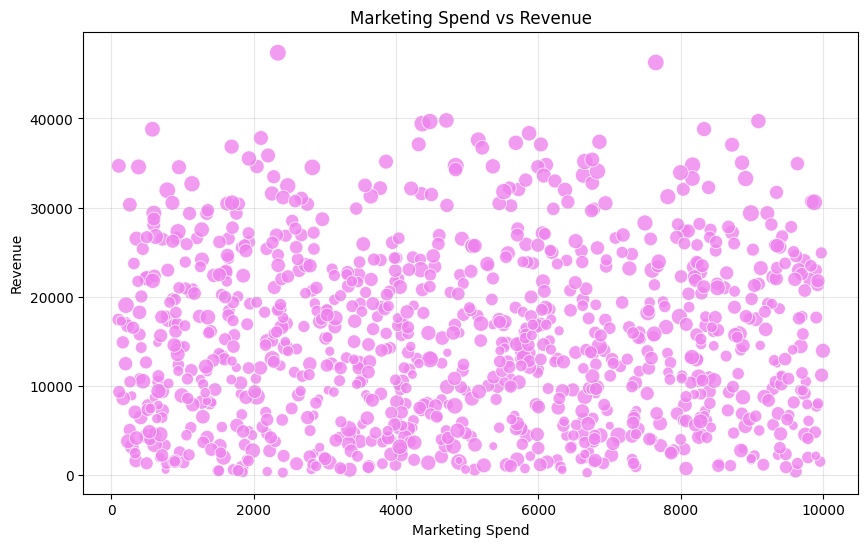

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Marketing_Spend'], y=data['Revenue'], 
            s=data['Units_Sold'] * 3,alpha=0.8, color='violet')  
plt.title('Marketing Spend vs Revenue')
plt.xlabel('Marketing Spend' )
plt.grid(True,alpha=0.3)
plt.ylabel('Revenue')
plt.show()

In [51]:
monthly_sales = data.groupby(['Month', 'Product_Category']).agg({'Revenue': 'sum'}).reset_index()

In [50]:
fig=px.area(monthly_sales, 
              x='Month', y='Revenue', color='Product_Category', 
              line_group='Product_Category', title='Revenue Over Time by Category')
fig.update_layout(xaxis_title='Month', yaxis_title='Revenue')
fig.show()

In [28]:
category_marketing=data.groupby('Product_Category').sum()['Marketing_Spend'].reset_index()

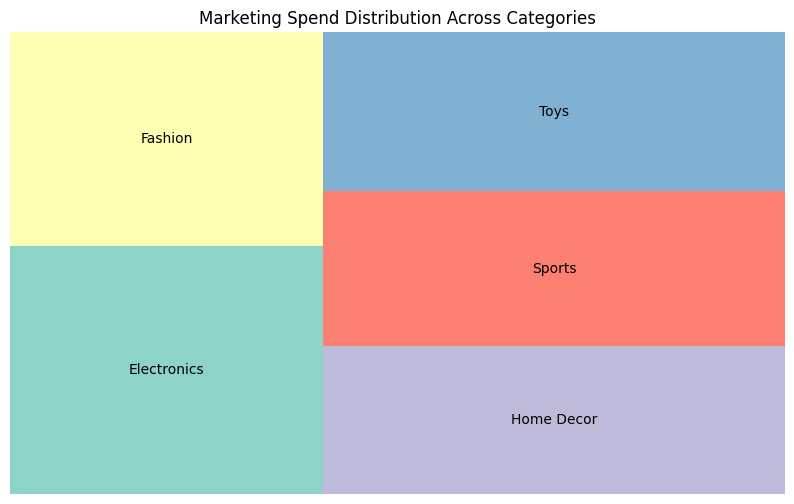

In [29]:
plt.figure(figsize=(10,6))
squarify.plot(sizes=category_marketing['Marketing_Spend'],label=category_marketing['Product_Category'],
              color=sns.color_palette('Set3'), 
              alpha=1)
plt.title('Marketing Spend Distribution Across Categories')
plt.axis('OFF')
plt.show()